# Decision Tree

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading Data
hrtdis=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
# Basic Evaluation of data
hrtdis.info()
hrtdis.head()
hrtdis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [155]:
# EDA
# Basic eda
hrtdis.isnull().sum()
hrtdis[hrtdis.duplicated()]
hrtdis.drop_duplicates(inplace=True)
hrtdis['oldpeak']=hrtdis['oldpeak'].fillna(hrtdis['oldpeak'].median())
hrtdis.isnull().sum()
numfea=hrtdis.select_dtypes(include=['int64','float64'])
hrtdis

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


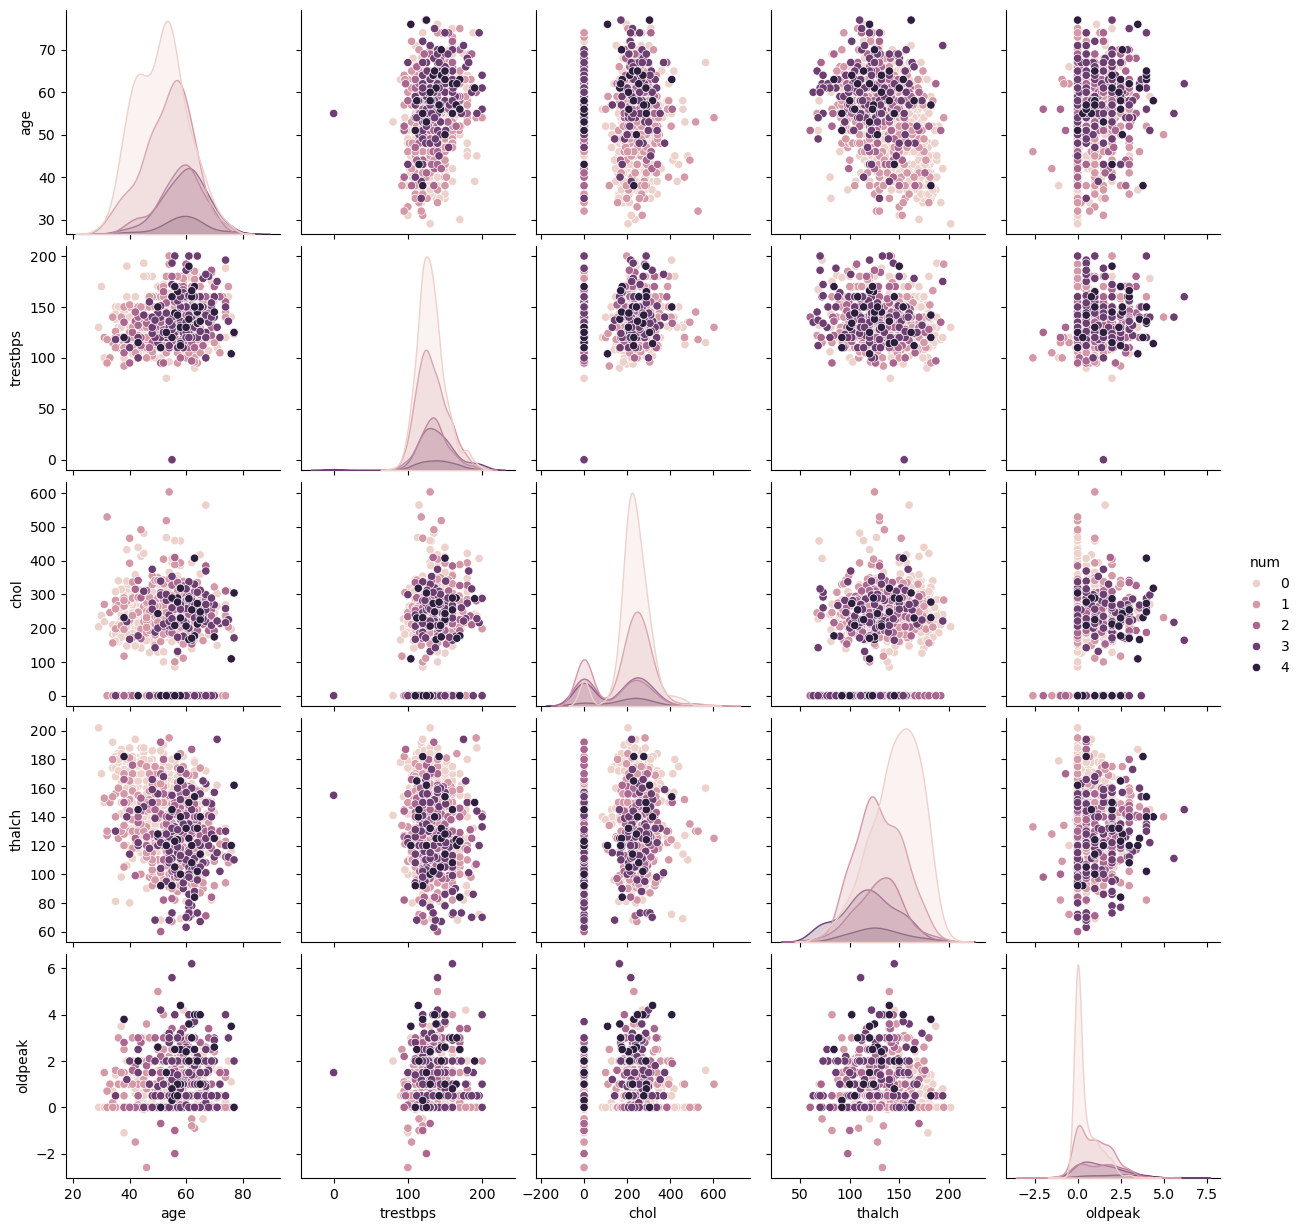

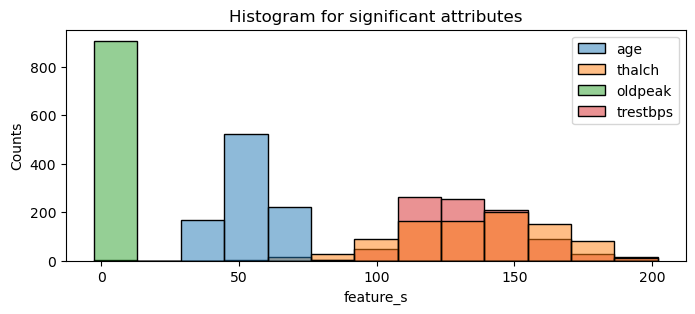

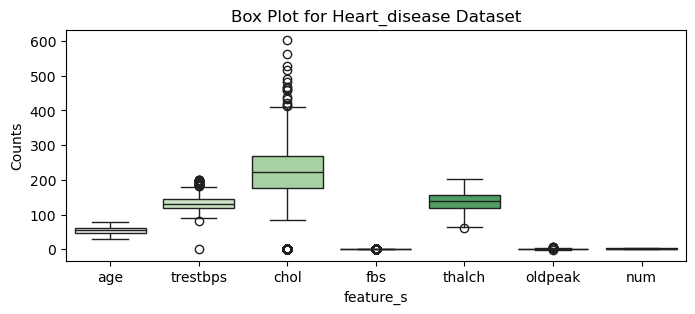

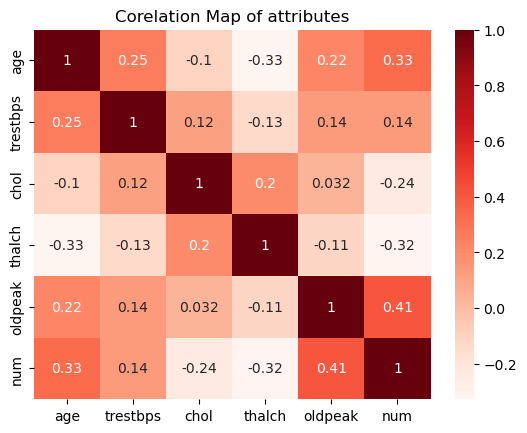

In [156]:
# Data Visualisation
# Pair plot for Overview relation with in attributes
sns.pairplot(numfea,hue='num')
plt.show()
# Histogram
plt.figure(figsize=(8,3))
sns.histplot(hrtdis[['age','thalch','oldpeak','trestbps']])
plt.title('Histogram for significant attributes')
plt.xlabel('feature_s')
plt.ylabel('Counts')
plt.show()
# Box plot for Outliers detection
plt.figure(figsize=(8,3))
sns.boxplot(hrtdis,palette='Greens')
plt.title('Box Plot for Heart_disease Dataset')
plt.xlabel('feature_s')
plt.ylabel('Counts')
plt.show()
# Determining corelation in features
cor=numfea.corr()
# Visualising correlation for better insight
plt.title('Corelation Map of attributes')
sns.heatmap(cor,cmap='Reds',annot=True)
plt.show()

In [157]:
# Converting Bool DT to 1 or 0
hrtdis['exang']=hrtdis['exang'].apply(lambda x : 1 if x == True else 0)
# Encoding all categorical data. 
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
hrtdis['sex']=labenc.fit_transform(hrtdis['sex'])
hrtdis['cp']=labenc.fit_transform(hrtdis['cp'])
hrtdis['fbs']=labenc.fit_transform(hrtdis['fbs'])
hrtdis['restecg']=labenc.fit_transform(hrtdis['restecg'])
hrtdis['slope']=labenc.fit_transform(hrtdis['slope'])
hrtdis['thal']=labenc.fit_transform(hrtdis['thal'])

In [158]:
# Removing Outliers by IsolationForest
from sklearn.ensemble import IsolationForest
isolationforest=IsolationForest(contamination=0.1,random_state=10)
x=isolationforest.fit_predict(hrtdis)
hrtdis['Anomaly']=x
# Removing Outliers 907 --> 816
hrtdis_clean = hrtdis[hrtdis['Anomaly'] == 1].drop(columns=['Anomaly'])
hrtdis_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
5,66,1,0,160,228,0,0,138,0,2.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,1,0,136,248,0,1,140,1,4.0,0,2,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4


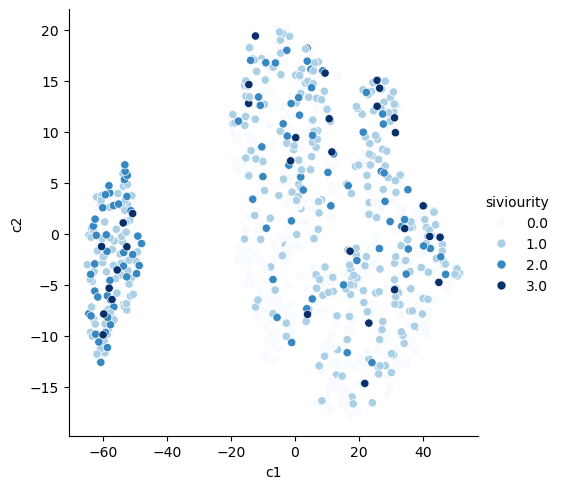

In [159]:
# getting features for analysis
features=hrtdis_clean.iloc[:,:-1]
# building TSNE model for better visualisation.
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
t_arr=tsne.fit_transform(features)
# Changing to DataFarme from array
tdata=pd.DataFrame(t_arr,columns=['c1','c2'])
tdata['siviourity']=hrtdis_clean['num'] # Replace NaN with median
tdata['siviourity'] = tdata['siviourity'].fillna(tdata['siviourity'].median()) 
# Ploting scatter plot to see data Distribution.
sns.relplot(tdata,x='c1',y='c2', kind='scatter', hue='siviourity',palette='Blues')
plt.show()

In [160]:
# Spliting Data into Features and label
from sklearn.model_selection import train_test_split
X=hrtdis_clean.iloc[:,:-1]
y=hrtdis_clean.iloc[:,-1]
# Spliting data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_test.shape,y_train.shape
# Building Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=42)
model.fit(X_train,y_train)
# Predicting values from trained data
yhat_pred=model.predict(X_train)
# Building Confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_train,yhat_pred)
print(classification_report(y_train,yhat_pred))
cm

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       294
           1       0.80      0.88      0.84       198
           2       0.84      0.82      0.83        79
           3       1.00      0.78      0.88        68
           4       1.00      0.31      0.47        13

    accuracy                           0.88       652
   macro avg       0.91      0.75      0.79       652
weighted avg       0.89      0.88      0.88       652



array([[277,  12,   5,   0,   0],
       [ 19, 174,   5,   0,   0],
       [  3,  11,  65,   0,   0],
       [  0,  13,   2,  53,   0],
       [  1,   8,   0,   0,   4]], dtype=int64)

In [161]:
# Testing data by X_test values
ytest_pred=model.predict(X_test)
# Building Confusion matrix and classification report
cm=confusion_matrix(y_test,ytest_pred)
print(classification_report(y_test,ytest_pred))
cm

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        75
           1       0.52      0.59      0.55        49
           2       0.36      0.26      0.30        19
           3       0.20      0.12      0.15        17
           4       1.00      0.50      0.67         4

    accuracy                           0.62       164
   macro avg       0.57      0.47      0.50       164
weighted avg       0.60      0.62      0.60       164



array([[64,  7,  2,  2,  0],
       [12, 29,  5,  3,  0],
       [ 1, 10,  5,  3,  0],
       [ 5,  9,  1,  2,  0],
       [ 0,  1,  1,  0,  2]], dtype=int64)

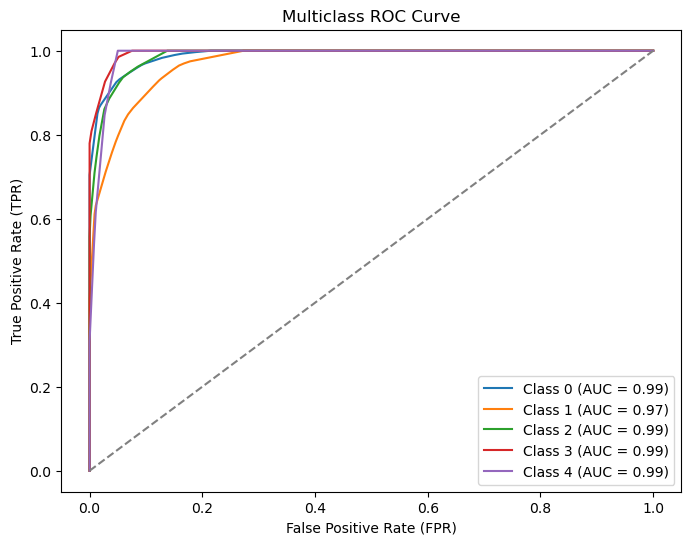

In [162]:
# Building ROC curve individually for each class
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
y_train_probs = model.predict_proba(X_train)
n_classes = y_train_probs.shape[1]
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_train == i, y_train_probs[:, i])  # One-vs-Rest
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_train == i, y_train_probs[:, i]):.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()

In [163]:
# Tuining Hyperparameters and Selecting good one
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,9],
    'min_samples_leaf':[1,2,5]
}
grid_search=GridSearchCV(model,param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

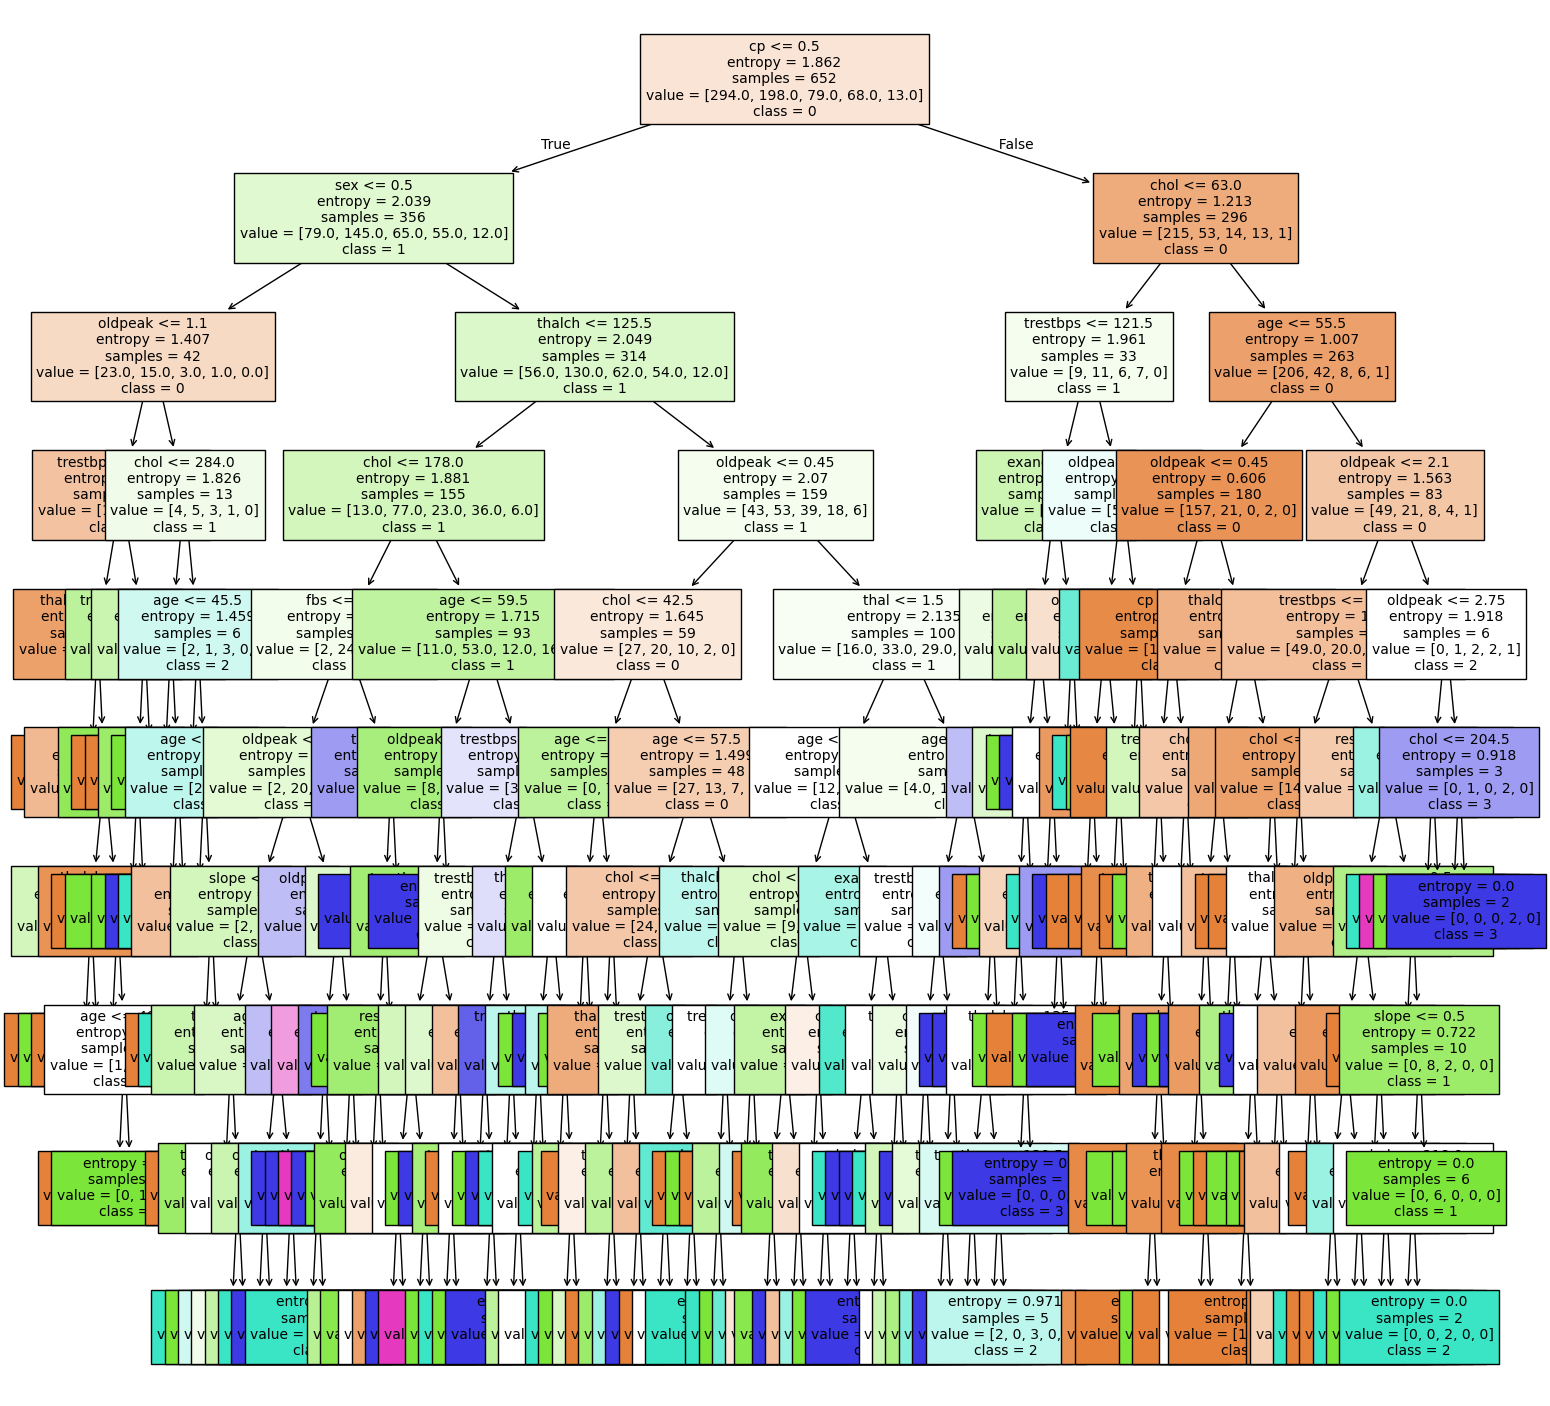

In [164]:
# Decision Tree Model Visualization with gained parameters
from sklearn.tree import plot_tree
fnames=X.columns
cnames=y.unique()
cnames = [str(c) for c in hrtdis['num'].unique()]
plt.figure(figsize=(18,18))
plot_tree(model,feature_names=fnames,class_names=cnames,filled=True,max_depth=10,fontsize=10)
plt.show()

#### Interview Questions
    i.HYPER-PARAMETERS
    
        1.Max Depth : Limits tree depth to prevent overfitting too deep may overfit,too shallow may underfit.
        2.Min Samples Split : Minimum samples needed to split a node; higher values reduce overfitting.
        3.Min Samples Leaf : Minimum samples per leaf larger values make trees more generalized.
        4.Max Features : Number of features considered per split lower values increase bias, higher may overfit.
        5.Criterion : Function (e.g., Gini or Entropy) to measure split quality affects decision boundaries.
        6.Max Leaf Nodes : Limits leaf nodes to control model complexity and improve generalization.
        
    ii.Differences between Label Encoding and One Hot Encoding

        1.Label Encoding assigns a unique integer to each category, making it ordinal (e.g., Hyd = 0, Tpt = 1, Man = 2).
        2.One-Hot Encoding creates binary columns for each category, using 0s and 1s to indicate presence.
        3.Label Encoding can mislead models into assuming an ordinal relationship between categories.
        4.One-Hot Encoding avoids ordinal misinterpretation but increases dimensionality with many categories.
        5.Use Label Encoding for ordinal data and One-Hot Encoding for nominal categories.